In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"train image shape {train_image.shape}")
print(f"test image shape {test_image.shape}")
print(f"train label shape {train_label.shape}")
print(f"test label shape {test_label.shape}")

train image shape (60000, 28, 28)
test image shape (10000, 28, 28)
train label shape (60000,)
test label shape (10000,)


In [4]:
import matplotlib.pyplot as plt

0


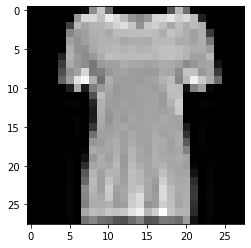

In [5]:
plt.imshow(train_image[10], cmap = "gray")
print(train_label[10])
plt.show()

## Normalize Data

In [6]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [8]:
train_image[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Define Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(512, tf.nn.relu),
    tf.keras.layers.Dense(256, tf.nn.relu),
    tf.keras.layers.Dense(128, tf.nn.relu),
    tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [12]:
model.fit(train_image, train_label, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4768 - accuracy: 0.8267
Epoch 2/20
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3651 - accuracy: 0.8666
Epoch 3/20
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3265 - accuracy: 0.8784
Epoch 4/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.3033 - accuracy: 0.8872
Epoch 5/20
60000/60000 [==============================] - 10s 175us/sample - loss: 0.2864 - accuracy: 0.8931
Epoch 6/20
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2680 - accuracy: 0.8988
Epoch 7/20
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2566 - accuracy: 0.9034
Epoch 8/20
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2466 - accuracy: 0.9065
Epoch 9/20
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2359 - accuracy: 0.910

In [13]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3962 - accuracy: 0.8941


[0.396194017803669, 0.8941]